# Máster en Big Data y Data Science

# Metodologías de gestión y diseño de proyectos de big data

## Actividad Guiada III - Aplicando CRISP-DM en un entorno ágil

---

### Sprint 2 - Modelado + Evaluación + Despliegue

### Carga de librerías base

In [2]:
import pandas as pd
import numpy as np

### Lectura del dataset generado en la fase de "Preparación de los datos"

In [3]:
datos = pd.read_csv('datos_completos_filtrados.csv', sep=';')
print(datos.columns)
datos.head()

Index(['propuesta', 'estado_inscripcion', 'fecha_ultimo_examen',
       'anio_ultima_reinscripcion', 'regular', 'calidad', 'segundo_anio',
       'rango_promedios', 'examenes_1er_semestre', 'avance_ingreso',
       'avance_1er_semestre', 'avance_carrera'],
      dtype='object')


,propuesta,estado_inscripcion,fecha_ultimo_examen,anio_ultima_reinscripcion,regular,calidad,segundo_anio,rango_promedios,examenes_1er_semestre,avance_ingreso,avance_1er_semestre,avance_carrera
0,134,Pendiente,23/08/2021,2021.0,S,A,S,Medio,N,1.0,0.0,0.125000
1,130,Pendiente,14/12/2020,2021.0,S,A,N,Medio,N,1.0,0.0,0.047619
2,130,Pendiente,NaN,2021.0,S,A,S,Alto,N,1.0,0.0,0.142857
3,130,Pendiente,23/08/2021,2021.0,S,A,S,Alto,N,0.0,0.0,0.261905
4,130,Aceptado,NaN,NaN,N,P,N,Bajo,N,0.5,0.0,0.000000


In [4]:
datos.calidad.value_counts()

A    378
P    204
Name: calidad, dtype: int64

### Separación del atributo de clase y las columnas a utilizar del dataset

In [6]:
labels = datos.calidad.values

features = datos[['propuesta', 'estado_inscripcion', 'fecha_ultimo_examen',
       'anio_ultima_reinscripcion', 'regular', 'segundo_anio',
       'rango_promedios', 'examenes_1er_semestre', 'avance_ingreso',
       'avance_1er_semestre', 'avance_carrera']]

In [7]:
print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['A' 'A' 'A' 'A' 'P' 'A' 'A' 'P' 'A' 'P']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,propuesta,estado_inscripcion,fecha_ultimo_examen,anio_ultima_reinscripcion,regular,segundo_anio,rango_promedios,examenes_1er_semestre,avance_ingreso,avance_1er_semestre,avance_carrera
0,134,Pendiente,23/08/2021,2021.0,S,S,Medio,N,1.0,0.0,0.125000
1,130,Pendiente,14/12/2020,2021.0,S,N,Medio,N,1.0,0.0,0.047619
2,130,Pendiente,NaN,2021.0,S,S,Alto,N,1.0,0.0,0.142857
3,130,Pendiente,23/08/2021,2021.0,S,S,Alto,N,0.0,0.0,0.261905
4,130,Aceptado,NaN,NaN,N,N,Bajo,N,0.5,0.0,0.000000


### Ajustes de valores para un mejor rendimiento de las técnicas de aprendizaje automático

In [ ]:
pip install sweetviz

In [10]:
import warnings
import sweetviz as sw

warnings.filterwarnings('ignore')

reporte_completo = sw.analyze(datos)
reporte_completo.show_html(filepath='reporte_datos_AG3.html',
            open_browser=True,
            layout='vertical',
            scale=None)

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_datos_AG3.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Antes de pasar a valores binarizados se puede hacer un mapeo para tener valores más representativos


In [11]:
# Ejemplos con algunos atributos

display(features.estado_inscripcion.unique())

display(features.fecha_ultimo_examen.unique())

array(['Pendiente', 'Aceptado'], dtype=object)

array(['23/08/2021', '14/12/2020', nan, '20/08/2021', '16/03/2021',
       '15/12/2020', '19/08/2021', '03/08/2021', '05/08/2021',
       '18/08/2021', '20/03/2021', '15/03/2021', '27/02/2021',
       '17/12/2020', '24/02/2021', '19/12/2020', '17/03/2021',
       '18/03/2021', '17/08/2021', '23/02/2021', '07/08/2021',
       '04/08/2021', '21/08/2021'], dtype=object)

In [13]:
# Columna: estado_inscripcion
cambios_estado = {
    'Pendiente' : 'P',
    'Aceptado' : 'A'
}

estadoN = features.loc[:, ('estado_inscripcion')].map(cambios_estado).rename('estadoN')

def rindio_examen(row):
    if pd.isna(row.fecha_ultimo_examen):
        return 'N'
    else:
        return 'S'

rindio_examen = features.apply(lambda row : rindio_examen(row), axis=1).rename('rindio_examen')

def inscripto_ult_ciclo(row):
    # para este caso el último ciclo lectivo es 2021
    if row.anio_ultima_reinscripcion == 2021:
        return 'S'
    else:
        return 'N'

inscripto_ult_ciclo = features.apply(lambda row : inscripto_ult_ciclo(row), axis=1).rename('inscripto_ult_ciclo')


atributos_nuevos = pd.concat([estadoN, rindio_examen, inscripto_ult_ciclo], axis=1)
atributos_nuevos.head()

,estadoN,rindio_examen,inscripto_ult_ciclo
0,P,S,S
1,P,S,S
2,P,N,S
3,P,S,S
4,A,N,N


In [14]:
ajustes = ['estado_inscripcion', 'fecha_ultimo_examen', 'anio_ultima_reinscripcion']

features = features.drop(ajustes, axis=1)

datos_procesados = pd.concat([features, atributos_nuevos], axis=1)
datos_procesados.head()

,propuesta,regular,segundo_anio,rango_promedios,examenes_1er_semestre,avance_ingreso,avance_1er_semestre,avance_carrera,estadoN,rindio_examen,inscripto_ult_ciclo
0,134,S,S,Medio,N,1.0,0.0,0.125000,P,S,S
1,130,S,N,Medio,N,1.0,0.0,0.047619,P,S,S
2,130,S,S,Alto,N,1.0,0.0,0.142857,P,N,S
3,130,S,S,Alto,N,0.0,0.0,0.261905,P,S,S
4,130,N,N,Bajo,N,0.5,0.0,0.000000,A,N,N


#### Se pasa a binarizar los atributos.

In [15]:
data = pd.get_dummies(datos_procesados)
data.head()

,propuesta,avance_ingreso,avance_1er_semestre,avance_carrera,regular_N,regular_S,segundo_anio_N,segundo_anio_S,rango_promedios_Alto,rango_promedios_Bajo,rango_promedios_Medio,examenes_1er_semestre_A,examenes_1er_semestre_I,examenes_1er_semestre_N,estadoN_A,estadoN_P,rindio_examen_N,rindio_examen_S,inscripto_ult_ciclo_N,inscripto_ult_ciclo_S
0,134,1.0,0.0,0.125000,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1
1,130,1.0,0.0,0.047619,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1
2,130,1.0,0.0,0.142857,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1
3,130,0.0,0.0,0.261905,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1
4,130,0.5,0.0,0.000000,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0


In [16]:
# Se verifica la presencia de valores nulos
#np.isnan(data).any()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   propuesta                582 non-null    int64  
 1   avance_ingreso           582 non-null    float64
 2   avance_1er_semestre      582 non-null    float64
 3   avance_carrera           582 non-null    float64
 4   regular_N                582 non-null    uint8  
 5   regular_S                582 non-null    uint8  
 6   segundo_anio_N           582 non-null    uint8  
 7   segundo_anio_S           582 non-null    uint8  
 8   rango_promedios_Alto     582 non-null    uint8  
 9   rango_promedios_Bajo     582 non-null    uint8  
 10  rango_promedios_Medio    582 non-null    uint8  
 11  examenes_1er_semestre_A  582 non-null    uint8  
 12  examenes_1er_semestre_I  582 non-null    uint8  
 13  examenes_1er_semestre_N  582 non-null    uint8  
 14  estadoN_A                5

### Tareas de preparación de datos aplicables

Reemplazando o complementando las tareas previas se podrían ejecutar:
* Transformación del atributo propuesta para que no sea considerado como numérico.
* Evaluar transformación para los demás atributos numéricos para su pase a rangos tal como se realizó con el promedio.
* Entre otras tareas

### Generación de los datasets de entrenamiento y testing

In [17]:
from sklearn.model_selection import train_test_split

# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels)

# Toma por defecto 75% (entrenamiento) - 25% (testeo)
# Se podría modificar con el parámetro test_size = 0.## y el complemento para training

In [18]:
# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}")

Un registro de entrenamiento: 
propuesta                  130.000000
avance_ingreso               0.500000
avance_1er_semestre          0.333333
avance_carrera               0.690476
regular_N                    0.000000
regular_S                    1.000000
segundo_anio_N               0.000000
segundo_anio_S               1.000000
rango_promedios_Alto         0.000000
rango_promedios_Bajo         0.000000
rango_promedios_Medio        1.000000
examenes_1er_semestre_A      0.000000
examenes_1er_semestre_I      0.000000
examenes_1er_semestre_N      1.000000
estadoN_A                    1.000000
estadoN_P                    0.000000
rindio_examen_N              1.000000
rindio_examen_S              0.000000
inscripto_ult_ciclo_N        0.000000
inscripto_ult_ciclo_S        1.000000
Name: 41, dtype: float64
--------------------------------------------------
Label del registro: 
A


In [19]:
# Vista de los datos de testeo para una fila

print(f"Un registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de testeo: 
propuesta                  134.000000
avance_ingreso               1.000000
avance_1er_semestre          0.333333
avance_carrera               0.050000
regular_N                    0.000000
regular_S                    1.000000
segundo_anio_N               1.000000
segundo_anio_S               0.000000
rango_promedios_Alto         1.000000
rango_promedios_Bajo         0.000000
rango_promedios_Medio        0.000000
examenes_1er_semestre_A      0.000000
examenes_1er_semestre_I      0.000000
examenes_1er_semestre_N      1.000000
estadoN_A                    1.000000
estadoN_P                    0.000000
rindio_examen_N              1.000000
rindio_examen_S              0.000000
inscripto_ult_ciclo_N        0.000000
inscripto_ult_ciclo_S        1.000000
Name: 54, dtype: float64
--------------------------------------------------
Label del registro: 
A


### Aplicación de técnicas para extracción de patrones

In [20]:
#Importaciones varias para la evaluación

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
    disp.plot()
    plt.show()

#### ZeroR

In [21]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

prediction = clf.predict(test_data)
print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.678082191780822
Vista de una muestra de valores de predicción y datos de testeo:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
['A' 'A' 'P' 'A' 'A' 'A' 'A' 'A' 'P' 'P']


In [22]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

#### Regresión Logística

In [23]:
from sklearn.linear_model import LogisticRegression

# Prueba Nro.1
lreg = LogisticRegression(solver = 'liblinear')

lreg.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        99
           P       1.00      1.00      1.00        47

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Matriz de confusión:


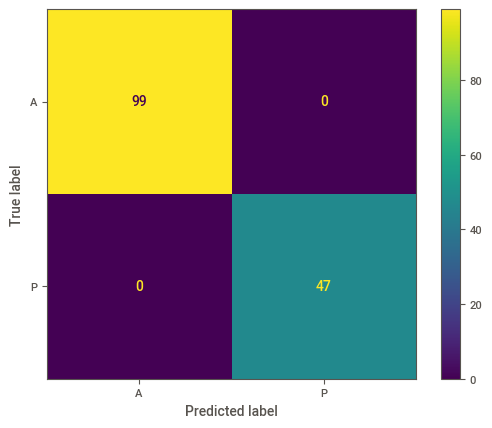

In [24]:
#Prueba Nro. 1
evaluar_modelo(lreg, test_data, test_labels)

##Prueba 2 Regresión Logística

In [30]:
from sklearn.linear_model import LogisticRegression

# Prueba Nro.2
lreg2 = LogisticRegression(solver='saga', C=10)

lreg2.fit(train_data, train_labels)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        99
           P       1.00      1.00      1.00        47

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Matriz de confusión:


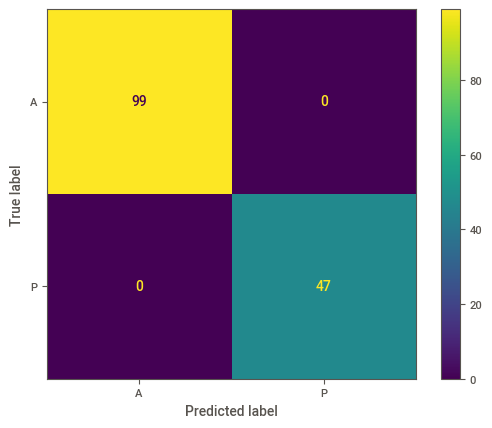

In [31]:
#Prueba Nro. 2
evaluar_modelo(lreg2, test_data, test_labels)

#### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Prueba Nro.2
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute', leaf_size=10, weights='distance')

knn.fit(train_data, train_labels)


KNeighborsClassifier(algorithm='brute', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Prueba nro. 1
knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'ball_tree', leaf_size = 25)

knn.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        99
           P       1.00      1.00      1.00        47

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Matriz de confusión:


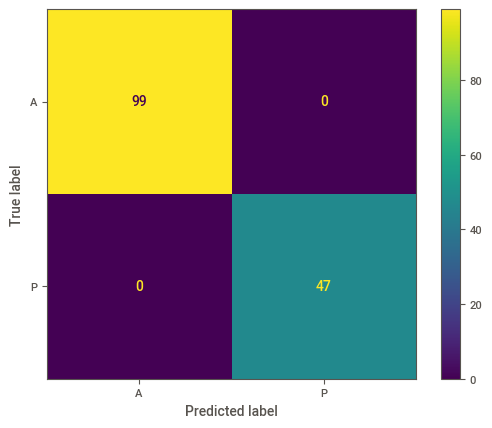

In [36]:
# Prueba nro. 1
evaluar_modelo(knn, test_data, test_labels)

#### Árboles (TDIDT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Prueba Nro. 1
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_split=10)

dtc.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           P       1.00      1.00      1.00        46

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Matriz de confusión:


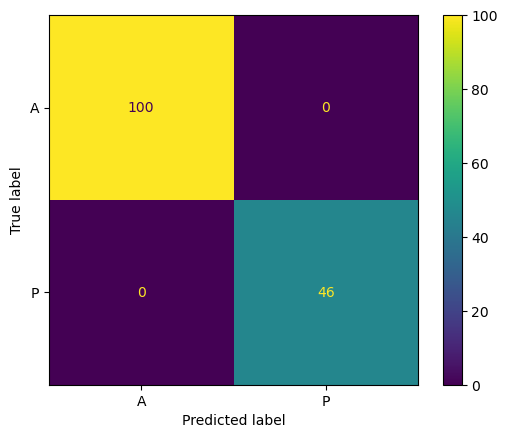

In [ ]:
# Prueba Nro. 1
evaluar_modelo(dtc, test_data, test_labels)

In [ ]:
from IPython.display import SVG
from sklearn.tree import export_graphviz
from graphviz import Source
# Se requiere tener la librería graphviz instalada a nivel del kernel que usa la libreta
# Puede hacerse con: pip install graphviz | conda install -c anaconda python-graphviz pydot

graph = Source(export_graphviz(dtc, out_file=None, feature_names=data.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

### Métodos de ensamblado de modelos: RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prueba nro. 1
rndf = RandomForestClassifier(n_estimators=10)
rndf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Prueba Nro.1
rndf = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=None)

rndf.fit(train_data, train_labels)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Prueba Nro.1 (Configuración personalizada)
rndf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

rndf.fit(train_data, train_labels)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        99
           P       1.00      1.00      1.00        47

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Matriz de confusión:


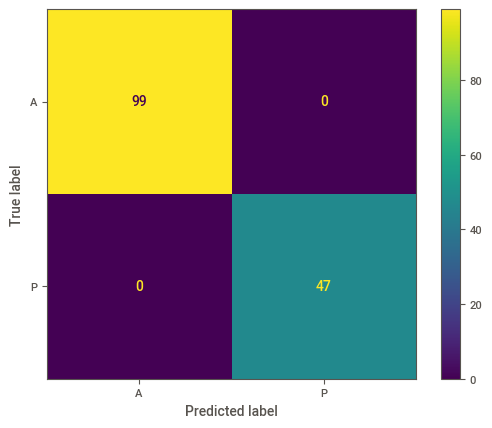

In [55]:
# Prueba nro. 1
evaluar_modelo(rndf, test_data, test_labels)

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        99
           P       1.00      1.00      1.00        47

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Matriz de confusión:


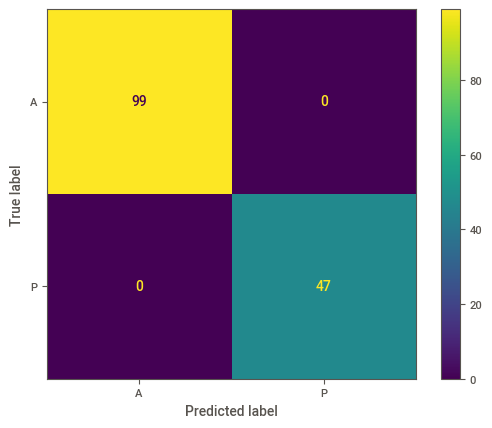

In [34]:
# Prueba nro. 2
evaluar_modelo(rndf, test_data, test_labels)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Prueba nro. 1
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)

gbc.fit(train_data, train_labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='log_loss', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           P       1.00      1.00      1.00        46

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Matriz de confusión:


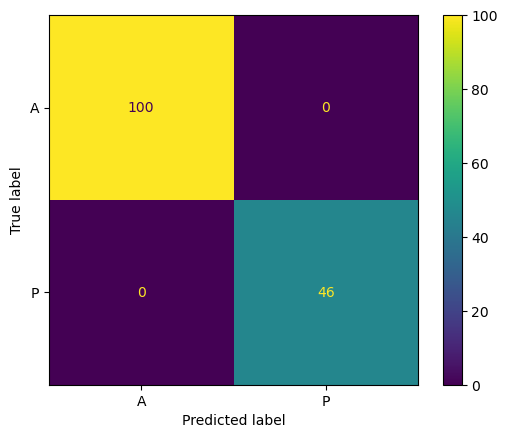

In [ ]:
# Prueba nro. 1
evaluar_modelo(gbc, test_data, test_labels)

#### TODO: posibilidades de mejora de la libreta

* Evaluación del clasificador a través de validación cruzada
* Ejecutar pruebas que contemplen datos con mayor o menor grado de transformaciones aplicadas (relacionado con lo visto en la AG3 parte 1 donde se describieron otras alternativas)
* Implementar clasificación con otras técnicas (por ejemplo: redes neuronales, SVM, entre otras)
* Evaluar la combinación de técnicas, por ejemplo: clustering y sobre esos resultados aplicación de árboles de decisión para detectar patrones de agrupamiento y ahí relacionarlo con la situación de los estudiantes
* Integrar técnicas de extracción de reglas de asociación (con mayor "legibilidad" para usuarios no-técnicos)
* Entre otras opciones

### Prueba de despliegue (aplicación sobre los datos nuevos)

In [40]:
datos_nuevos = pd.read_csv('datos_nuevos_22.csv', sep=';')
datos_nuevos.head(5)

,propuesta,estado_inscripcion,fecha_ultimo_examen,anio_ultima_reinscripcion,regular,segundo_anio,rango_promedios,examenes_1er_semestre,avance_ingreso,avance_1er_semestre,avance_carrera
0,130,Aceptado,NaN,2021.0,S,N,Medio,N,1.0,0.0,0.047619
1,130,Pendiente,23/08/2021,2021.0,S,S,Medio,N,1.0,0.0,125.000000
2,130,Pendiente,NaN,2021.0,S,N,Medio,N,1.0,0.0,0.047619
3,130,Pendiente,NaN,2021.0,S,S,Alto,N,1.0,0.0,0.142857
4,130,Pendiente,NaN,2021.0,S,N,Medio,N,1.0,0.0,0.047619


**Importante**: recordar que si se implementan operaciones de transformación sobre los datos será necesario (posiblemente) replicarlas sobre los datos nuevos para que ambos datasets sean compatibles.

#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [41]:
# Columna: estado_inscripcion
cambios_estado = {
    'Pendiente' : 'P',
    'Aceptado' : 'A'
}

estadoN = datos_nuevos.loc[:, ('estado_inscripcion')].map(cambios_estado).rename('estadoN')

def rindio_examen(row):
    if pd.isna(row.fecha_ultimo_examen):
        return 'N'
    else:
        return 'S'

rindio_examen = datos_nuevos.apply(lambda row : rindio_examen(row), axis=1).rename('rindio_examen')

def inscripto_ult_ciclo(row):
    if row.anio_ultima_reinscripcion == 2021:
        return 'S'
    else:
        return 'N'

inscripto_ult_ciclo = datos_nuevos.apply(lambda row : inscripto_ult_ciclo(row), axis=1).rename('inscripto_ult_ciclo')


atributos_nuevos = pd.concat([estadoN, rindio_examen, inscripto_ult_ciclo], axis=1)

ajustes = ['estado_inscripcion', 'fecha_ultimo_examen', 'anio_ultima_reinscripcion']

datos_nuevos = datos_nuevos.drop(ajustes, axis=1)

nuevos_procesados = pd.concat([datos_nuevos, atributos_nuevos], axis=1)
nuevos_procesados.head()

,propuesta,regular,segundo_anio,rango_promedios,examenes_1er_semestre,avance_ingreso,avance_1er_semestre,avance_carrera,estadoN,rindio_examen,inscripto_ult_ciclo
0,130,S,N,Medio,N,1.0,0.0,0.047619,A,N,S
1,130,S,S,Medio,N,1.0,0.0,125.000000,P,S,S
2,130,S,N,Medio,N,1.0,0.0,0.047619,P,N,S
3,130,S,S,Alto,N,1.0,0.0,0.142857,P,N,S
4,130,S,N,Medio,N,1.0,0.0,0.047619,P,N,S


#### Se obtienen los valores binarizados

In [42]:
# Se obtienen las transformaciones de valores correspondientes
nuevos_codif = pd.get_dummies(nuevos_procesados)

In [43]:
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   propuesta                967 non-null    int64  
 1   avance_ingreso           967 non-null    float64
 2   avance_1er_semestre      967 non-null    float64
 3   avance_carrera           967 non-null    float64
 4   regular_N                967 non-null    uint8  
 5   regular_S                967 non-null    uint8  
 6   segundo_anio_N           967 non-null    uint8  
 7   segundo_anio_S           967 non-null    uint8  
 8   rango_promedios_Alto     967 non-null    uint8  
 9   rango_promedios_Bajo     967 non-null    uint8  
 10  rango_promedios_Medio    967 non-null    uint8  
 11  examenes_1er_semestre_A  967 non-null    uint8  
 12  examenes_1er_semestre_I  967 non-null    uint8  
 13  examenes_1er_semestre_N  967 non-null    uint8  
 14  estadoN_A                9

### Ajuste de columnas para coincidir con el dataset de entrenamiento

In [44]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

{'inscripto_ult_ciclo_N'}

Datos nuevos: 20
Datos entrenamiento: 20
set()


In [45]:
# Finalmente, se tiene que adaptar el orden de las columnas

nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['propuesta', 'avance_ingreso', 'avance_1er_semestre', 'avance_carrera',
       'regular_N', 'regular_S', 'segundo_anio_N', 'segundo_anio_S',
       'rango_promedios_Alto', 'rango_promedios_Bajo', 'rango_promedios_Medio',
       'examenes_1er_semestre_A', 'examenes_1er_semestre_I',
       'examenes_1er_semestre_N', 'estadoN_A', 'estadoN_P', 'rindio_examen_N',
       'rindio_examen_S', 'inscripto_ult_ciclo_N', 'inscripto_ult_ciclo_S'],
      dtype='object')

### Predicción de valores en el dataset nuevo (2021-2022)

In [56]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = rndf.predict(nuevos_codif)

# Probar con los demás métodos

In [57]:
# Se convierten de array a dataframe para ser agregados como columna nueva en el dataset
prediccionDF = pd.DataFrame(prediccion_nuevos)

In [58]:
# Se agrega la nueva columna
datos_nuevos['calidad'] = prediccionDF

In [59]:
datos_nuevos.head()

,propuesta,regular,segundo_anio,rango_promedios,examenes_1er_semestre,avance_ingreso,avance_1er_semestre,avance_carrera,calidad
0,130,S,N,Medio,N,1.0,0.0,0.047619,A
1,130,S,S,Medio,N,1.0,0.0,125.000000,A
2,130,S,N,Medio,N,1.0,0.0,0.047619,A
3,130,S,S,Alto,N,1.0,0.0,0.142857,A
4,130,S,N,Medio,N,1.0,0.0,0.047619,A


In [60]:
# Se obtiene el conteo de valores para actualizar el documento del informe con la predicción realizada
pd.value_counts(datos_nuevos.calidad)

A    815
P    152
Name: calidad, dtype: int64